In [3]:
import torch
from torch import nn

#inport torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



getting the dataset

In [6]:
#setup training data
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [8]:
len(train_data),len(test_data)

(60000, 10000)

In [11]:
#see the first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [13]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [15]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [18]:
#check the shape
image.shape

torch.Size([1, 28, 28])

image shape: torch.Size([1, 28, 28])


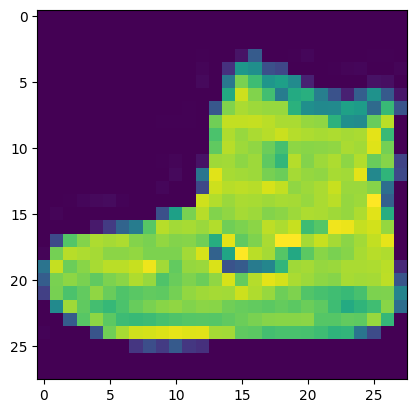

In [20]:
#visualizing the data
image,label=train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())

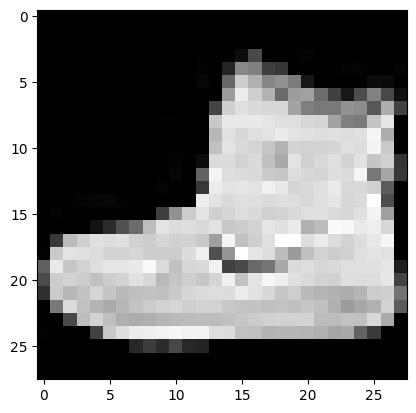

In [22]:
plt.imshow(image.squeeze(), cmap='gray')

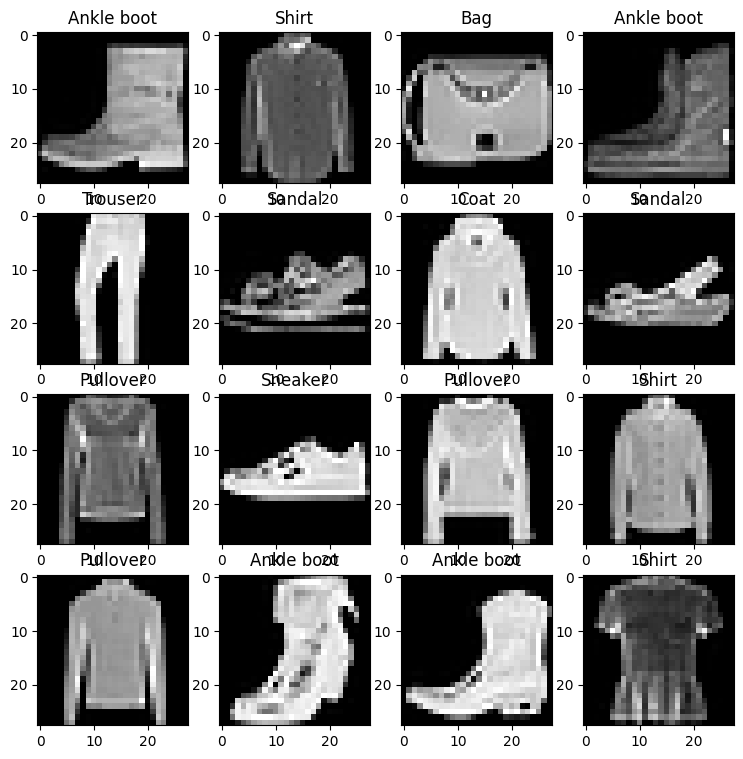

In [35]:
#plotmore images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,row*col+1):
  #print(i)
  random_idx=torch.randint(0,len(train_data),size=[1]).item()

  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])


In [39]:
#2 prepare data loader

from torch.utils.data import DataLoader
batch_size=32

train_dataloader=DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cb370ad7e20>,
 <torch.utils.data.dataloader.DataLoader at 0x7cb370ad7fa0>)

In [40]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [41]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

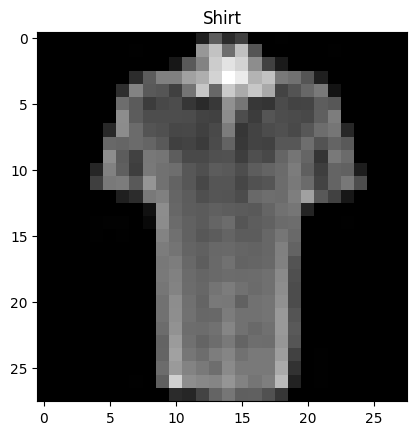

In [48]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])

In [53]:
#model 0: build a baseline model
flatten_model=nn.Flatten()
#get a single sample
x=train_features_batch[0]

#flatten the sampel
output=flatten_model(x)
print(x.shape)

print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [62]:
from torch import nn
class FashionMnistModelv0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),

        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [63]:
torch.manual_seed(42)

#setup a model with input parameters

model_0=FashionMnistModelv0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMnistModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)